In [2]:
from scipy import fft
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
f_message = 5.
f_carrier  = 150
N = 2000 # Sample numbers
T = 1/2000 # Sample spacing
timezone = np.linspace(-N*T/2, N*T/2, N)

In [5]:
sig_message = np.sin(2*np.pi * f_message * timezone)
sig_carrier  = np.sin(2*np.pi * f_carrier  * timezone)

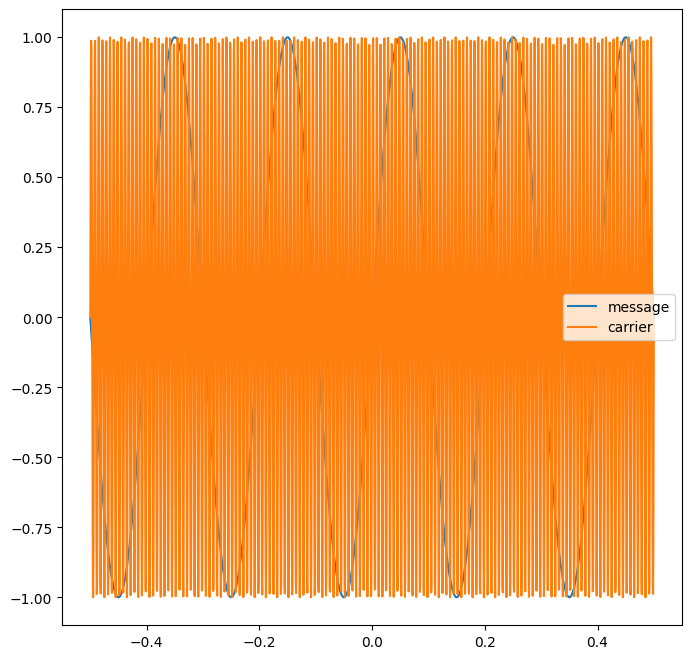

In [6]:

figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot()
ax.plot(timezone, sig_message)
ax.plot(timezone, sig_carrier)
ax.legend(["message", "carrier"])
plt.show()

AM Modulateion

$$AM = (1+ \frac{m(t)}{A}) \cdot A \sin(2 \pi f_s t + \phi)$$


$M := max(m(t))$, $A := max(s(t))$, 
$$ m := \frac{M}{A}$$

$m$ is a modulate sensitivity

In [7]:
A = np.max(np.abs(sig_carrier))
M = np.max(np.abs(sig_message))
m = M/A

In [8]:
signal_am = (1 + sig_message/A)*sig_carrier

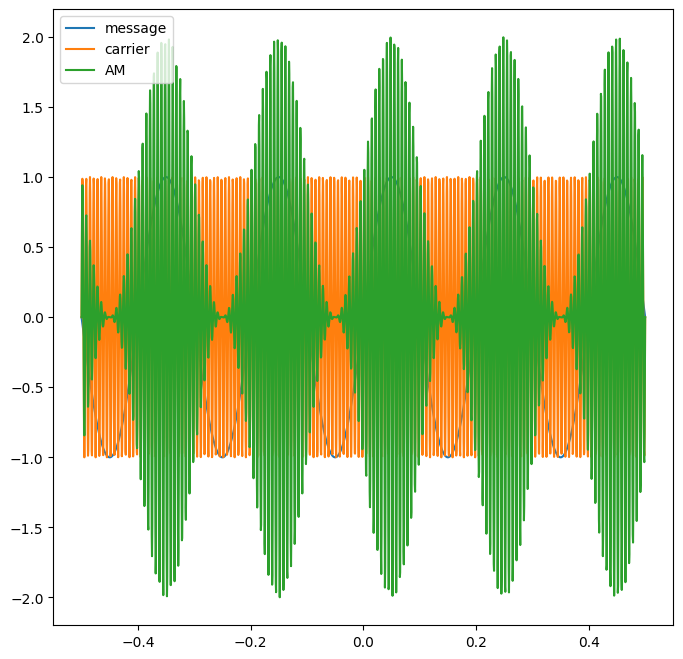

In [9]:
# AM modulation
figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot()
ax.plot(timezone, sig_message)
ax.plot(timezone, sig_carrier)
ax.plot(timezone, signal_am)
ax.legend(["message", "carrier", "AM"])
plt.show()

# FM 

$$ A \sin(2 \pi (f_c + s*m(t)) t)$$

In [10]:
s = 3
TWOPI = 2*np.pi

In [11]:
signal_fm = np.cos(TWOPI* (f_carrier * timezone + s * sig_message)+ 0.5*TWOPI* (f_carrier))

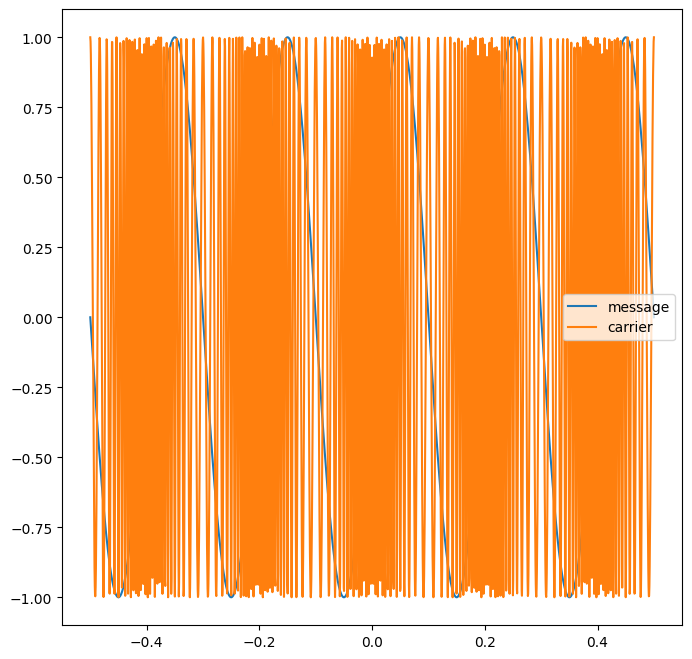

In [12]:
# AM modulation
figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot()
ax.plot(timezone, sig_message)
#ax.plot(timezone, sig_carrier)
#ax.plot(timezone, signal_am)
ax.plot(timezone, signal_fm)
ax.legend(["message", "carrier", "AM", "FM"])
plt.show()

Demodulation with product detector and low pass filter

In [13]:
ft_car = 2*np.pi * f_carrier *timezone
signal_y = signal_am * (np.sin(ft_car ) * np.power(np.cos(ft_car ), 2))

In [14]:
#signal_y = signal_y - max(signal_y)/2

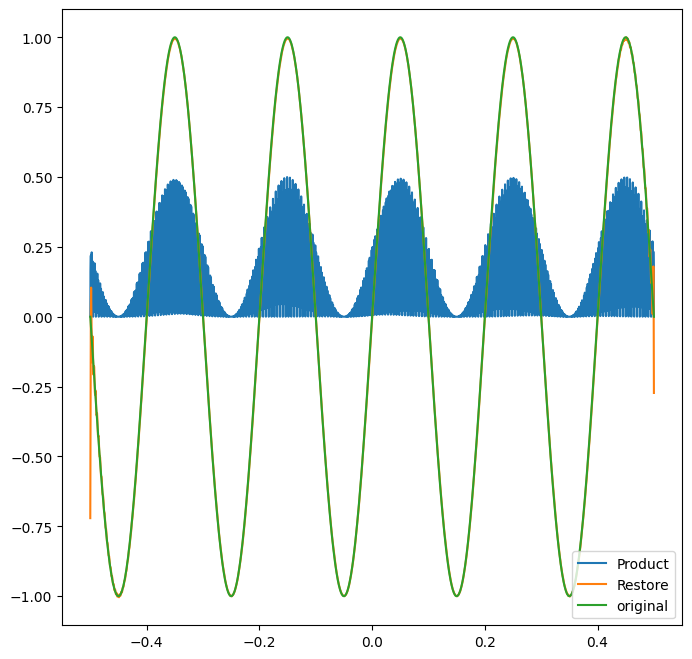

In [28]:
figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot()
ax.plot(timezone, signal_y)
#ax.plot(timezone[:79], ifft(passed_fft_y)*N)
restore_signal = (1/N)*np.convolve(signal_y, np.sin(5*np.pi* f_carrier*timezone)/(np.pi * timezone), "same")
restore_signal = (restore_signal - max(restore_signal)/2)
restore_signal = restore_signal/max(restore_signal)
ax.plot(timezone, restore_signal)
ax.plot(timezone, sig_message)
ax.legend(["Product", "Restore", "original"])
plt.show()

In [29]:
from scipy.fft import fft, fftfreq, fftshift

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_63484\2155596281.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


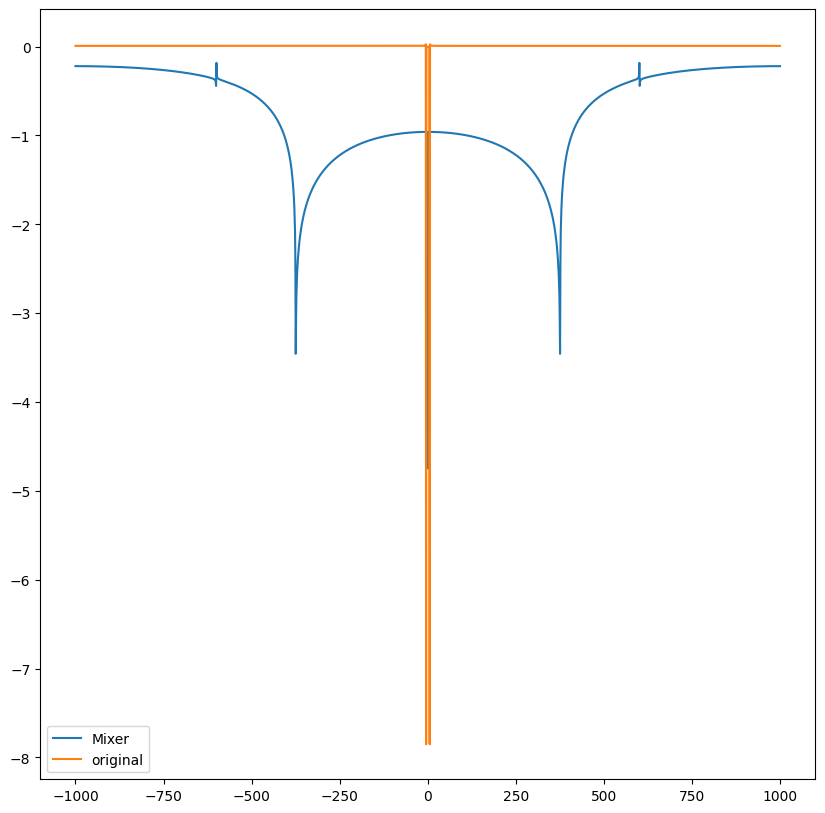

In [30]:
# Fourier Transform
#fft_y = fft(signal_y)
fft_y = fft(restore_signal)
fft_y = fftshift(fft_y)

fft_message = fft(sig_message)
fft_message = fftshift(fft_message)

freq = fftfreq(N, T)
freq = fftshift(freq)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.plot(freq, fft_y)
ax.plot(freq, fft_message)

ax.legend(["Mixer", "original"])
#ax.set_xlim(left=-50., right = 50.)
#ax.axvline(x = 4*f_carrier)
fig.show()

In [17]:
fft_y

array([-7.84641274e-09+0.00000000e+00j, -7.84400817e-09-1.58069334e-09j,
       -7.83679441e-09-3.16139536e-09j, ...,
       -7.82477129e-09+4.74211487e-09j, -7.83679441e-09+3.16139536e-09j,
       -7.84400817e-09+1.58069334e-09j])

In [18]:
passed_index = np.where(np.abs(freq) < 2*f_carrier)
passed_freq = freq[passed_index]
passed_fft_y = fft_y[passed_index]

c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Hyunseong\AppData\Local\Temp\ipykernel_1940\2638337966.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


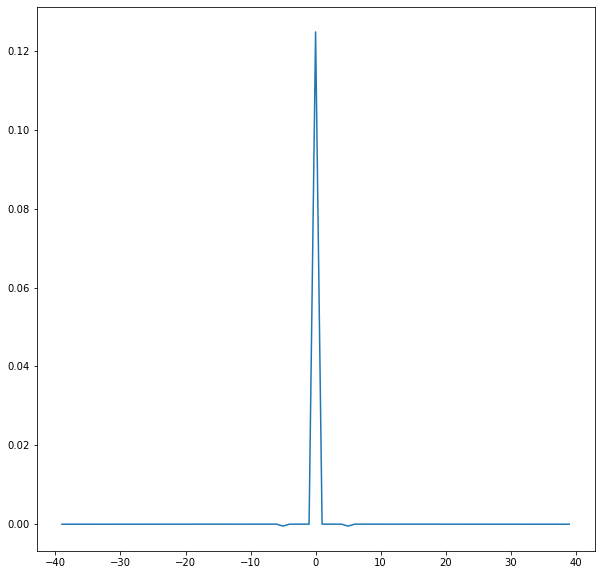

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.plot(passed_freq , passed_fft_y)
#ax.legend(["Mixer", "original"])
#ax.set_xlim(left=-50., right = 50.)
#ax.axvline(x = 4*f_carrier)
fig.show()

In [20]:
from scipy.fft import ifft

In [21]:
ifft(passed_fft_y)

array([ 1.50185321e-03-1.94495920e-20j, -9.75034773e-04+3.87946558e-05j,
        4.47892042e-04-3.56979445e-05j, -1.11942471e-04+1.34185687e-05j,
       -6.92483464e-07+1.11090492e-07j, -1.34657806e-04+2.71332015e-05j,
        4.83941402e-04-1.17711709e-04j, -9.90900049e-04+2.83188587e-04j,
        1.56459801e-03-5.15256449e-04j, -2.11259030e-03+7.90131147e-04j,
        2.54194858e-03-1.06774390e-03j, -2.78679582e-03+1.30325395e-03j,
        2.80806743e-03-1.45194529e-03j, -2.60831528e-03+1.48294909e-03j,
        2.22182513e-03-1.38289624e-03j, -1.71495688e-03+1.16448680e-03j,
        1.16733448e-03-8.62386001e-04j, -6.63821141e-04+5.32471453e-04j,
        2.74757379e-04-2.38949537e-04j, -4.97038809e-05+4.68240574e-05j,
        5.79648632e-06-5.91290195e-06j, -1.30744325e-04+1.44434391e-04j,
        3.83046274e-04-4.58550356e-04j, -7.04395050e-04+9.14842843e-04j,
        1.02781950e-03-1.45075787e-03j, -1.29281542e-03+1.98787549e-03j,
        1.45289918e-03-2.44118333e-03j, -1.48509666